### 데이터 EDA

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

train_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv')
oil_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/oil.csv')
transaction_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/transactions.csv')
stores_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/stores.csv')
holiday_event_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/holidays_events.csv')

Mounted at /content/gdrive


In [ ]:
# 데이터 한 테이블에 merge
stores_df = stores_df.rename(columns={'type': 'store_type'})
train_df = train_df.merge(stores_df, on ='store_nbr')
train_df = train_df.merge(oil_df, on ='date', how='left')
holiday_event_df = holiday_event_df.rename(columns={'type': 'holiday_type'})
train_df = train_df.merge(holiday_event_df, on='date', how='left')

train_df.head()

id        date  store_nbr      family  sales  onpromotion   city  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  Quito   
1   1  2013-01-01          1   BABY CARE    0.0            0  Quito   
2   2  2013-01-01          1      BEAUTY    0.0            0  Quito   
3   3  2013-01-01          1   BEVERAGES    0.0            0  Quito   
4   4  2013-01-01          1       BOOKS    0.0            0  Quito   

       state store_type  cluster  dcoilwtico holiday_type    locale  \
0  Pichincha          D       13         NaN      Holiday  National   
1  Pichincha          D       13         NaN      Holiday  National   
2  Pichincha          D       13         NaN      Holiday  National   
3  Pichincha          D       13         NaN      Holiday  National   
4  Pichincha          D       13         NaN      Holiday  National   

  locale_name         description transferred  
0     Ecuador  Primer dia del ano       False  
1     Ecuador  Primer dia del ano       False  
2     Ecuador  Primer dia del ano       False  
3     Ecuador  Primer dia del ano       False  
4     Ecuador  Primer dia del ano       False

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  holiday_type  object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  transferred   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 372.8+ MB


1) 년도 + 월에 따른 sales 분포 --> 년도 + 월의 총 매출/ 평균 매출 비교

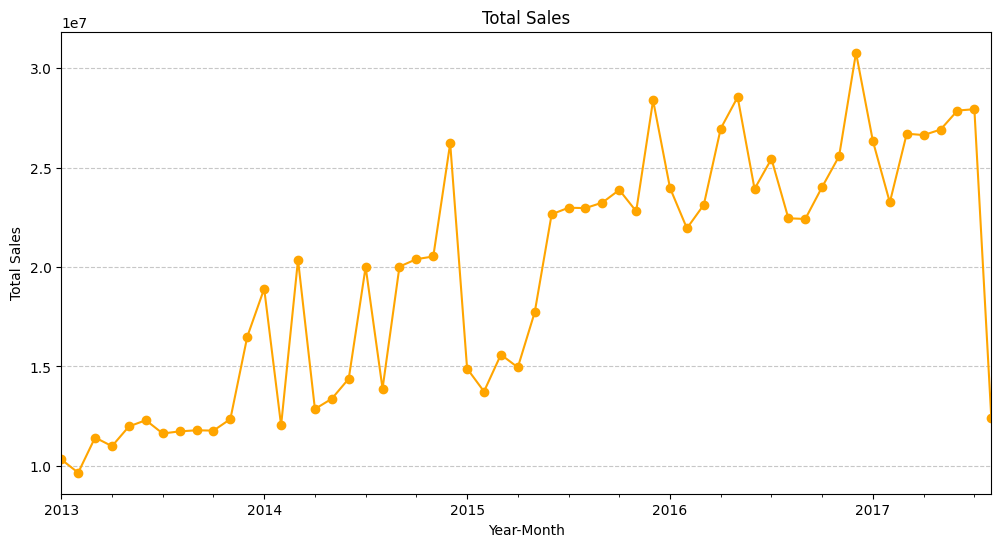

In [ ]:
import matplotlib.pyplot as plt

# 날짜 정보가 있는 열을 datetime 형식으로 변환합니다.
train_df['date'] = pd.to_datetime(train_df['date'])

# 'date' 열에서 년도와 월 정보를 추출합니다.
train_df['year_month'] = train_df['date'].dt.to_period('M')

# 년도와 월별로 총 매출을 집계합니다.
year_monthly_sales = train_df.groupby('year_month')['sales'].sum()

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
year_monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Total Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Pandas 출력 옵션 설정
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 년도와 월별로 매출을 집계
year_monthly_sales = train_df.groupby('year_month')['sales'].sum().reset_index()

# 결과를 출력합니다.
print(year_monthly_sales)

   year_month       sales
0     2013-01 10327624.74
1     2013-02  9658959.78
2     2013-03 11428497.04
3     2013-04 10993464.74
4     2013-05 11985564.51
5     2013-06 12299583.12
6     2013-07 11631952.53
7     2013-08 11737788.92
8     2013-09 11792933.23
9     2013-10 11775620.36
10    2013-11 12356559.29
11    2013-12 16499412.29
12    2014-01 18911640.70
13    2014-02 12038352.63
14    2014-03 20365584.02
15    2014-04 12861251.06
16    2014-05 13379785.26
17    2014-06 14385985.37
18    2014-07 20005735.76
19    2014-08 13885176.42
20    2014-09 20022416.11
21    2014-10 20396101.31
22    2014-11 20531635.20
23    2014-12 26220696.17
24    2015-01 14896922.06
25    2015-02 13742395.85
26    2015-03 15598607.52
27    2015-04 14955068.17
28    2015-05 17730368.24
29    2015-06 22652762.26
30    2015-07 22982392.43
31    2015-08 22963674.24
32    2015-09 23240882.48
33    2015-10 23878267.66
34    2015-11 22804953.37
35    2015-12 28385843.58
36    2016-01 23977804.89
37    2016-0

- 년도가 지남에 따라 조금씩 증가하는 형태

- 2014년 12월 -> 2015년 1월에 가장 급격한 하락이 있었음

- 2017년은 8월에 총 매출이 급격히 낮아졌는데 데이터가 8월 16일까지 밖에 없어서 그런 것으로 유추됨


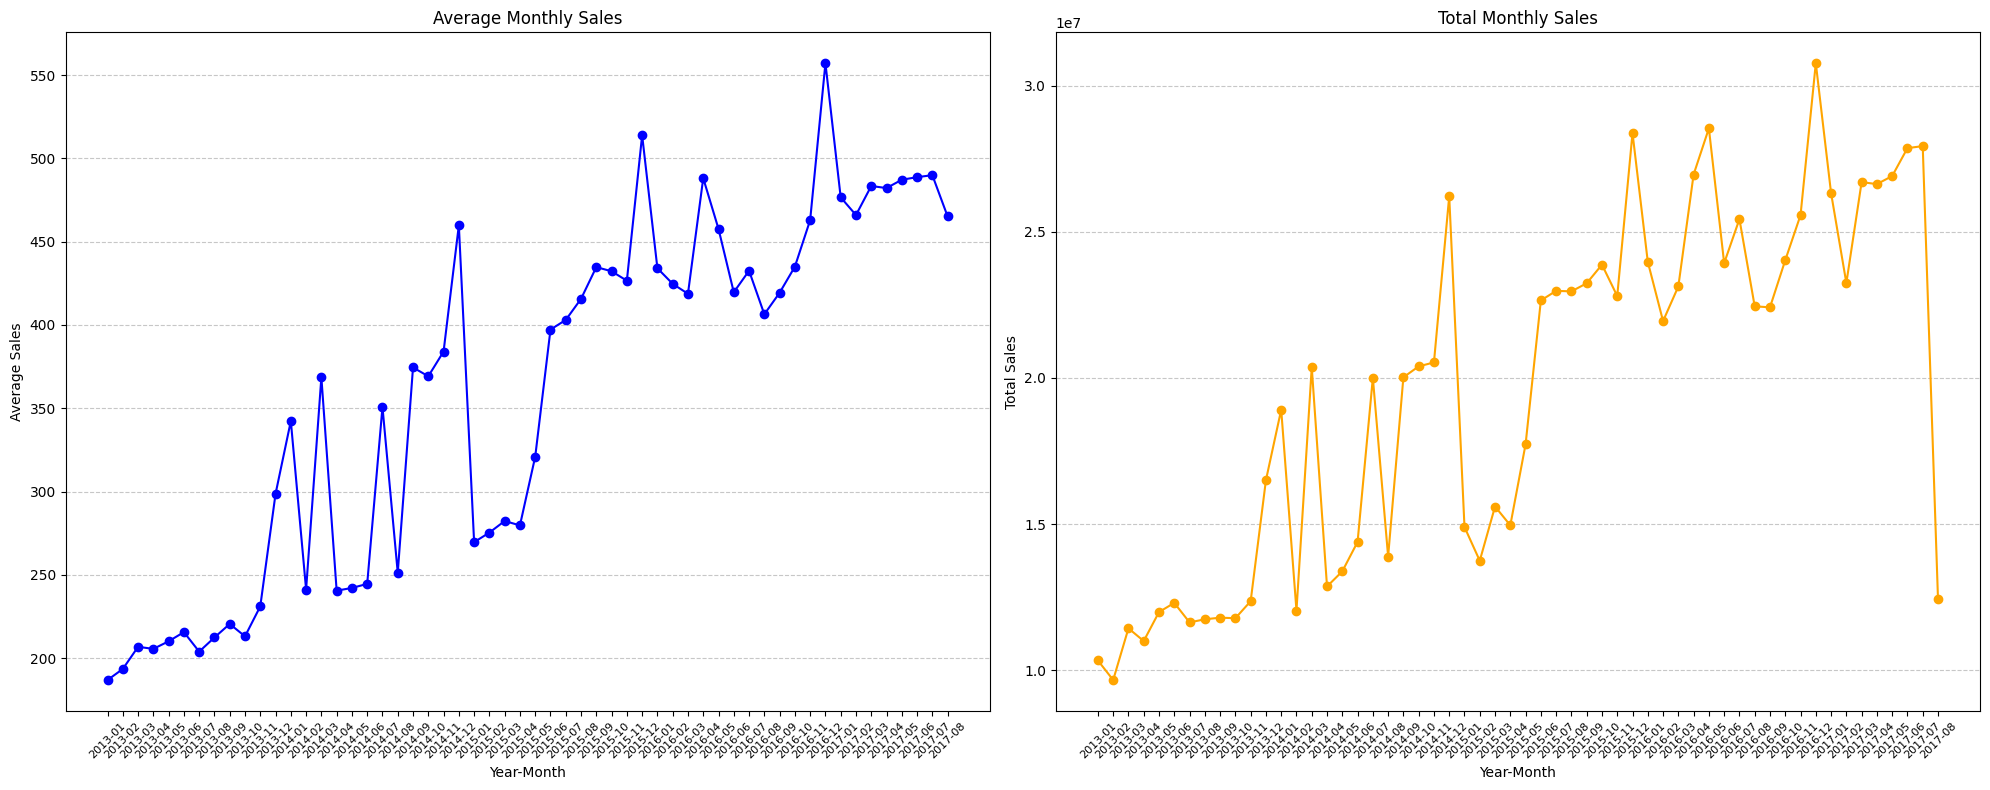

In [ ]:
# 'date' 열에서 년도와 월 정보를 추출합니다.
train_df['year_month'] = train_df['date'].dt.to_period('M')

# 년도와 월별로 총 매출을 집계합니다.
year_monthly_sales_sum = train_df.groupby('year_month')['sales'].sum()
# 년도와 월별로 총 매출의 평균을 계산합니다.
year_monthly_sales_mean = train_df.groupby('year_month')['sales'].mean()

# 그래프를 그립니다.
plt.figure(figsize=(20, 8))

# 첫 번째 서브플롯: 총 매출의 월별 평균
plt.subplot(1, 2, 1)
plt.plot(year_monthly_sales_mean.index.astype(str), year_monthly_sales_mean, marker='o', color='blue')
plt.title('Average Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 두 번째 서브플롯: 총 매출
plt.subplot(1, 2, 2)
plt.plot(year_monthly_sales_sum.index.astype(str), year_monthly_sales_sum, marker='o', color='orange')
plt.title('Total Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# 년도와 월별로 평균 매출
year_monthly_mean_sales = train_df.groupby('year_month')['sales'].mean().reset_index()

# 결과를 출력합니다.
print(year_monthly_mean_sales)

   year_month  sales
0     2013-01 186.95
1     2013-02 193.58
2     2013-03 206.88
3     2013-04 205.64
4     2013-05 210.18
5     2013-06 215.69
6     2013-07 203.98
7     2013-08 212.48
8     2013-09 220.59
9     2013-10 213.16
10    2013-11 231.14
11    2013-12 298.68
12    2014-01 342.34
13    2014-02 241.27
14    2014-03 368.66
15    2014-04 240.58
16    2014-05 242.20
17    2014-06 244.63
18    2014-07 350.83
19    2014-08 251.35
20    2014-09 374.53
21    2014-10 369.21
22    2014-11 384.06
23    2014-12 459.82
24    2015-01 269.67
25    2015-02 275.42
26    2015-03 282.37
27    2015-04 279.74
28    2015-05 320.96
29    2015-06 397.25
30    2015-07 403.03
31    2015-08 415.69
32    2015-09 434.73
33    2015-10 432.25
34    2015-11 426.58
35    2015-12 513.85
36    2016-01 434.05
37    2016-02 424.70
38    2016-03 418.74
39    2016-04 488.11
40    2016-05 457.67
41    2016-06 419.64
42    2016-07 432.56
43    2016-08 406.44
44    2016-09 419.33
45    2016-10 435.00
46    2016-11

- 총 매출이 아닌 평균 매출로 확인하여도 비슷한 구조를 가짐

- 2016년 4월 16일에 규모 7.8의 지진이 발생하여 몇 주동안 슈퍼마켓 매출에 큰 영향을 미친 미친 물가와 기타 긴급 생필품 기부를 위해 구호활동을 펼쳤다고 나와있었지만 해당 시점보다는 오히려 2016년 8월부터 증가하여 12월에 가장 높은 sales를 기록함

  --> 지진이 sales(평균, 총)에 영향을 준거로 판단할 수 있을지?

2) 년도 + 월에 따른 oil 분포

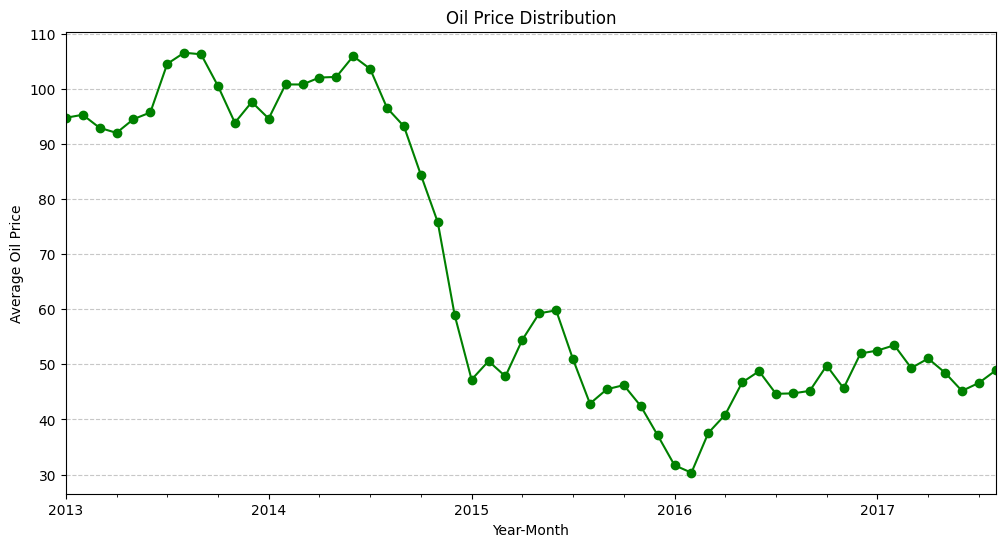

In [ ]:
# 'date' 열에서 년도와 월 정보를 추출합니다.
train_df['year_month'] = train_df['date'].dt.to_period('M')

# 년도와 월별로 평균 유가를 계산합니다.
year_monthly_oil_price = train_df.groupby('year_month')['dcoilwtico'].mean()

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
year_monthly_oil_price.plot(kind='line', marker='o', color='green')
plt.title('Oil Price Distribution')
plt.xlabel('Year-Month')
plt.ylabel('Average Oil Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 년도와 월별로 매출을 집계합니다.
year_monthly_oil = train_df.groupby('year_month')['dcoilwtico'].sum().reset_index()

# 결과를 출력합니다.
print(year_monthly_oil)

   year_month  dcoilwtico
0     2013-01  3545983.98
1     2013-02  3226970.34
2     2013-03  3312328.14
3     2013-04  3607605.54
4     2013-05  3705152.22
5     2013-06  3752802.90
6     2013-07  4285139.76
7     2013-08  4178077.20
8     2013-09  3788157.78
9     2013-10  4120661.16
10    2013-11  3345312.96
11    2013-12  3653331.66
12    2014-01  3540762.72
13    2014-02  3413474.46
14    2014-03  3772280.16
15    2014-04  3819627.90
16    2014-05  3823673.04
17    2014-06  4531269.60
18    2014-07  4247771.22
19    2014-08  3612577.32
20    2014-09  3488175.90
21    2014-10  3459093.66
22    2014-11  2566080.00
23    2014-12  2520157.86
24    2015-01  1682885.16
25    2015-02  1712680.20
26    2015-03  1874877.84
27    2015-04  2037734.82
28    2015-05  2112204.60
29    2015-06  2557544.22
30    2015-07  1995519.24
31    2015-08  1604192.04
32    2015-09  1701934.74
33    2015-10  1812151.44
34    2015-11  1512686.34
35    2015-12  1522309.14
36    2016-01  1072728.36
37    2016-0

- 2014.06 부터 2015.02 까지 큰 폭으로 유가가 감소

  - sales값도 2014.12 -> 2015.01에 큰 폭으로 떨어졌었음. 유가가 매출에 영향을 주는지 확인해본다(상관계수확인)

  - 2015년 중반 이후 평균 매출이 증가한 이유를 설명할 수 있을지?

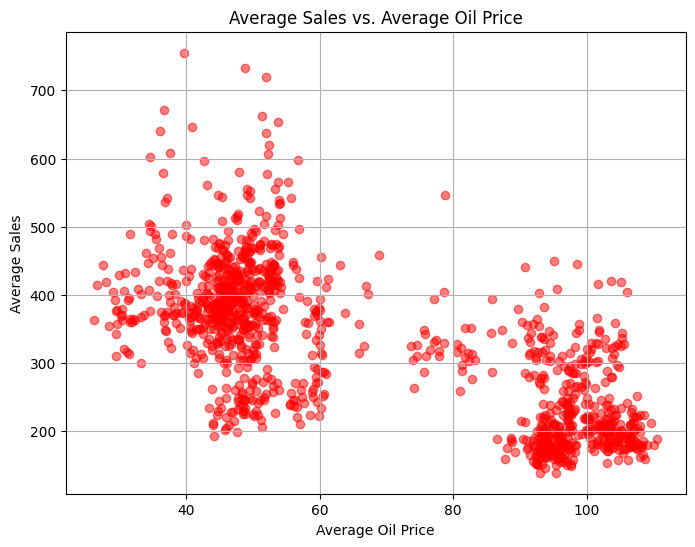

In [ ]:
# 날짜별 평균 매출과 평균 유가를 각각 추출
sales_mean = train_df.groupby('date')['sales'].mean()
oil_price_mean = train_df.groupby('date')['dcoilwtico'].mean()

# 그래프를 그리기
plt.figure(figsize=(8, 6))

# scatter plot 그래프
plt.scatter(oil_price_mean, sales_mean, color='red', alpha=0.5)
plt.xlabel('Average Oil Price')
plt.ylabel('Average Sales')
plt.title('Average Sales vs. Average Oil Price')
plt.grid(True)
plt.show()

- 위 차트는 유가가 낮을 때 평균 sales값이 유가가 높을 때보다 높다는 것을 나타냄

In [ ]:
# 평균 유가 - 평균 매출 상관 계수 계산
correlation = sales_mean.corr(oil_price_mean)

print("Correlation between Average Sales and Average Oil Price:", correlation)

Correlation between Average Sales and Average Oil Price: -0.7050015324800484


- 상관계수 또한 높은 것을 확인함 --> 유가가 매출에 영향을 끼치는 변수 중 하나임을 확인

- 반비례 관계로, 유가가 낮아질수록 매출이 증가하는 관계

3) 년도 + 월에 따른 holiday 타입 별 평균 매출

In [ ]:
train_df['holiday_type'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [ ]:
# 'date' 열에서 년도와 월 정보를 추출합니다.
train_df['year_month'] = train_df['date'].dt.to_period('M')

# 년도+월과 holiday 타입을 기준으로 그룹화하여 평균 매출을 계산합니다.
average_sales_by_holiday = train_df.groupby(['year_month', 'holiday_type'])['sales'].mean()

print(average_sales_by_holiday)

year_month  holiday_type
2013-01     Holiday          1.41
            Work Day       247.08
2013-02     Holiday        164.82
2013-03     Holiday        307.44
2013-04     Holiday        228.52
                            ...  
2017-06     Holiday        566.62
2017-07     Additional     429.33
            Holiday        537.71
2017-08     Holiday        445.14
            Transfer       463.73
Name: sales, Length: 96, dtype: float64


In [ ]:
# 년+월을 문자열로 변환합니다.
average_sales_by_holiday.index = average_sales_by_holiday.index.astype(str)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))

# 각 holiday 타입 별로 선 그래프를 그립니다.
for holiday_type in average_sales_by_holiday.columns:
    plt.plot(average_sales_by_holiday.index, average_sales_by_holiday[holiday_type], marker='o', label=holiday_type)

plt.title('Average Sales by Year-Month and Holiday Type')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

TypeError: Setting a MultiIndex dtype to anything other than object is not supported

해당 그래프를 어떻게 해석해야할지..잘 모르겠다

- 이벤트(초록색) : 2014년 6월에 월드컵 시작 -> 해당 시기에 매출 증가

- 이벤트(초록색) : ??? -> 해당 시기에 매출 증가

- 2016년 4월 지진 발생해서 5월 additional 휴무일을 알 수 있고 매출이 증가했다?

4) 상품 카테고리(family) 별 매출 분포


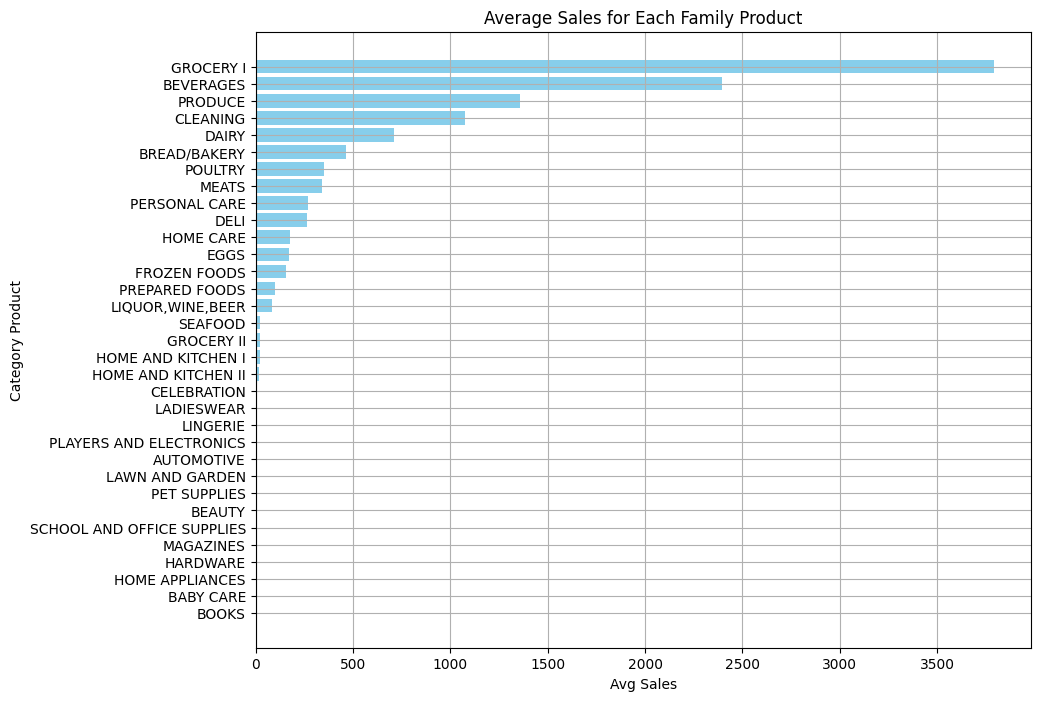

In [ ]:
# 판매군(family) 별로 평균 매출을 계산합니다.
avg_sales_by_family = train_df.groupby('family')['sales'].mean().reset_index()

# 판매량에 따라 내림차순으로 데이터를 정렬합니다.
avg_sales_by_family = avg_sales_by_family.sort_values(by='sales', ascending=True)

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 8))

# 막대 그래프를 그립니다.
plt.barh(avg_sales_by_family['family'], avg_sales_by_family['sales'], color='skyblue')

# 그래프 타이틀과 축 레이블 설정
plt.title('Average Sales for Each Family Product')
plt.xlabel('Avg Sales')
plt.ylabel('Category Product')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

5) 점포 별 매출 분포

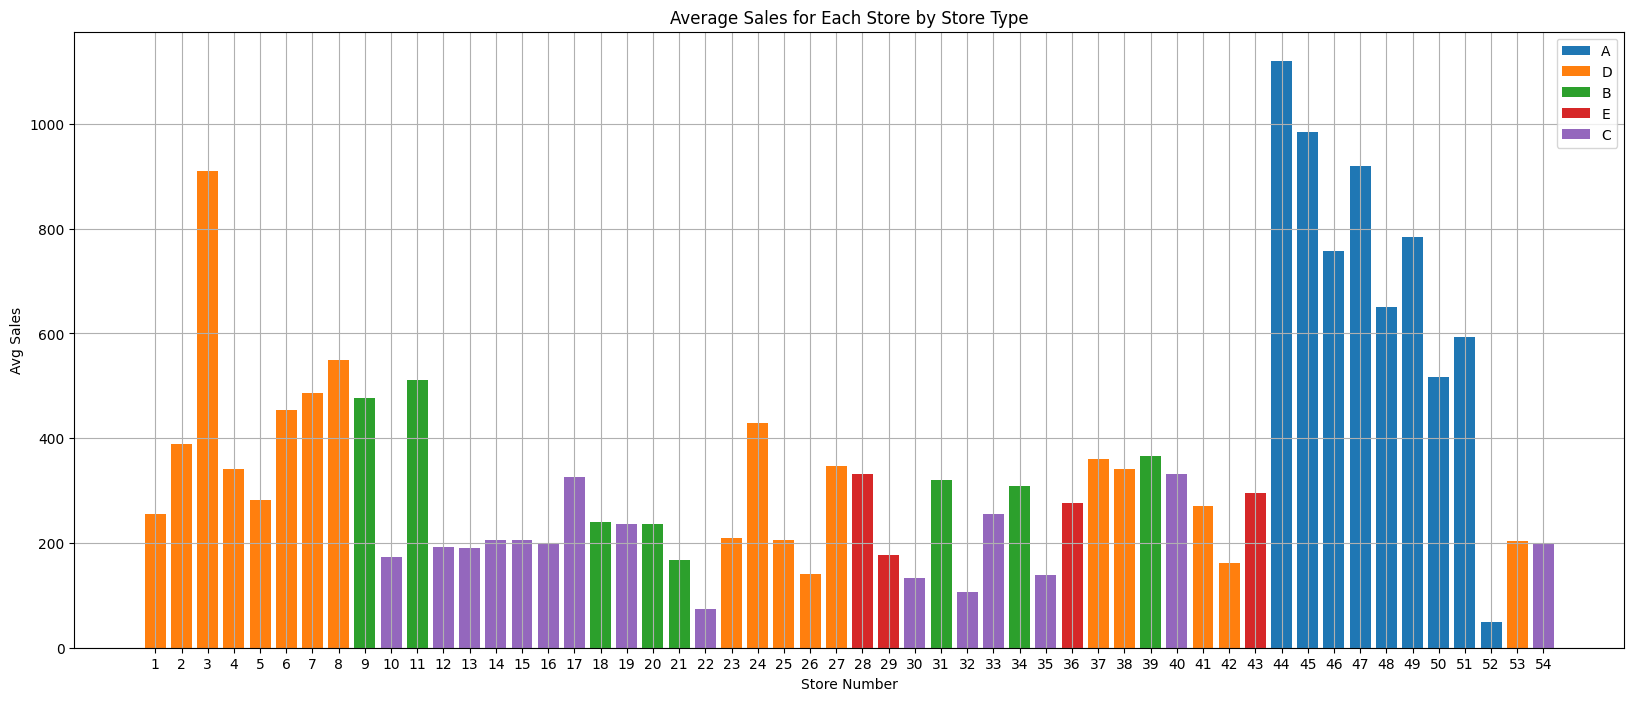

In [ ]:
# 매장(store_nbr) 및 store_type 별로 평균 매출을 계산합니다.
avg_sales_by_store_type = train_df.groupby(['store_nbr', 'store_type'])['sales'].mean().reset_index()

# 매출이 많은 순서대로 데이터를 정렬합니다.
avg_sales_by_store_type = avg_sales_by_store_type.sort_values(by='sales', ascending=False)

# 그래프를 그리기 위한 설정
plt.figure(figsize=(20, 8))

# 막대 그래프를 그립니다.
for store_type in avg_sales_by_store_type['store_type'].unique():
    plt.bar(avg_sales_by_store_type[avg_sales_by_store_type['store_type'] == store_type]['store_nbr'],
            avg_sales_by_store_type[avg_sales_by_store_type['store_type'] == store_type]['sales'],
            label=store_type)

# 각 매장 번호를 x 축에 모두 표시합니다.
plt.xticks(avg_sales_by_store_type['store_nbr'])

# 범례 추가
plt.legend()

# 그래프 타이틀과 축 레이블 설정
plt.title('Average Sales for Each Store by Store Type')
plt.xlabel('Store Number')
plt.ylabel('Avg Sales')
plt.xticks(rotation=0)

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

- 가게 타입이 A(파랑)인 경우가 평균 매출이 가장 높음

  --> 52번만 특히 낮은 이유는 무엇일지?

- 가게 타입 C(보라), E(빨강)이 가장 낮음

- 타입 D는 변동성이 높음


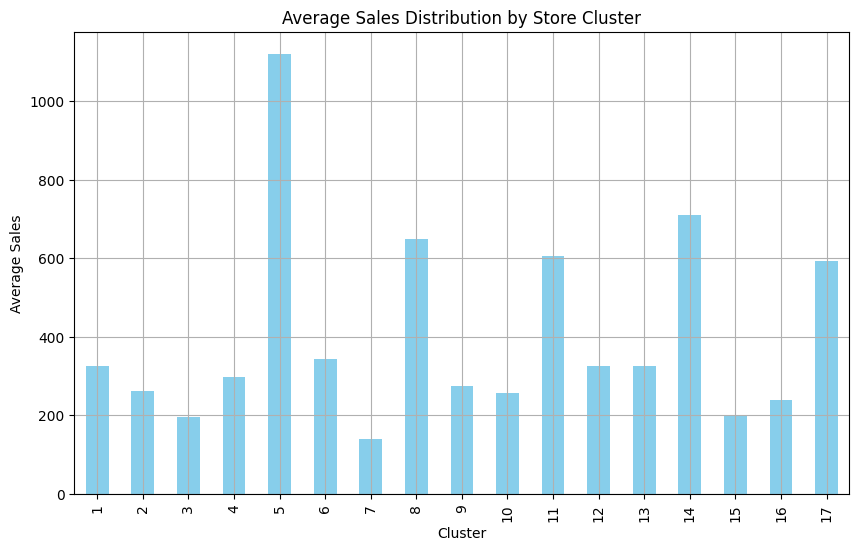

In [ ]:
# 점포 군집(클러스터) 별 평균 매출 분포

avg_sales_by_cluster = train_df.groupby('cluster')['sales'].mean()

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

# 막대 그래프를 그립니다.
avg_sales_by_cluster.plot(kind='bar', color='skyblue')

# 그래프 타이틀 설정
plt.title('Average Sales Distribution by Store Cluster')

# x 축과 y 축 레이블 설정
plt.xlabel('Cluster')
plt.ylabel('Average Sales')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

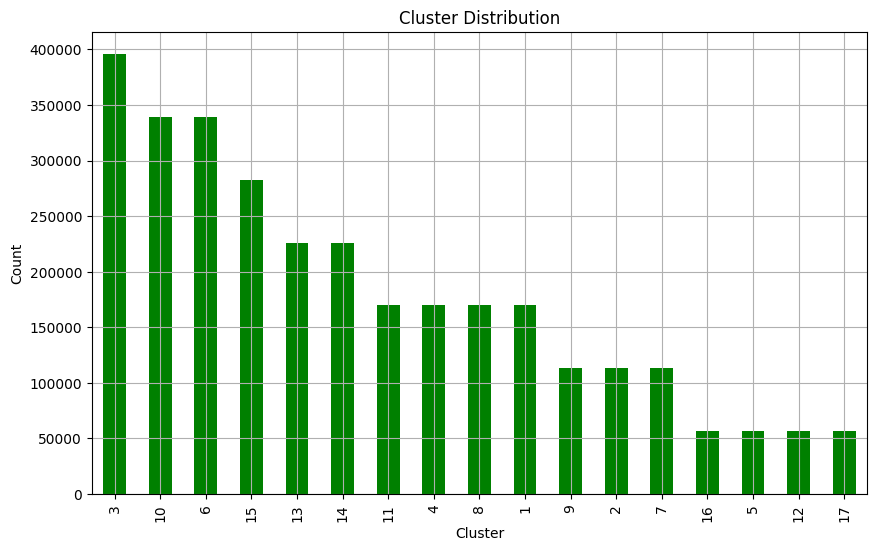

In [ ]:
# 클러스터 별 빈도수

cluster_counts = train_df['cluster'].value_counts()

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

# 막대 그래프를 그립니다.
cluster_counts.plot(kind='bar', color='green')

# 그래프 타이틀 설정
plt.title('Cluster Distribution')

# x 축과 y 축 레이블 설정
plt.xlabel('Cluster')
plt.ylabel('Count')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

5) 도시 별로 점포 타입 분포 확인

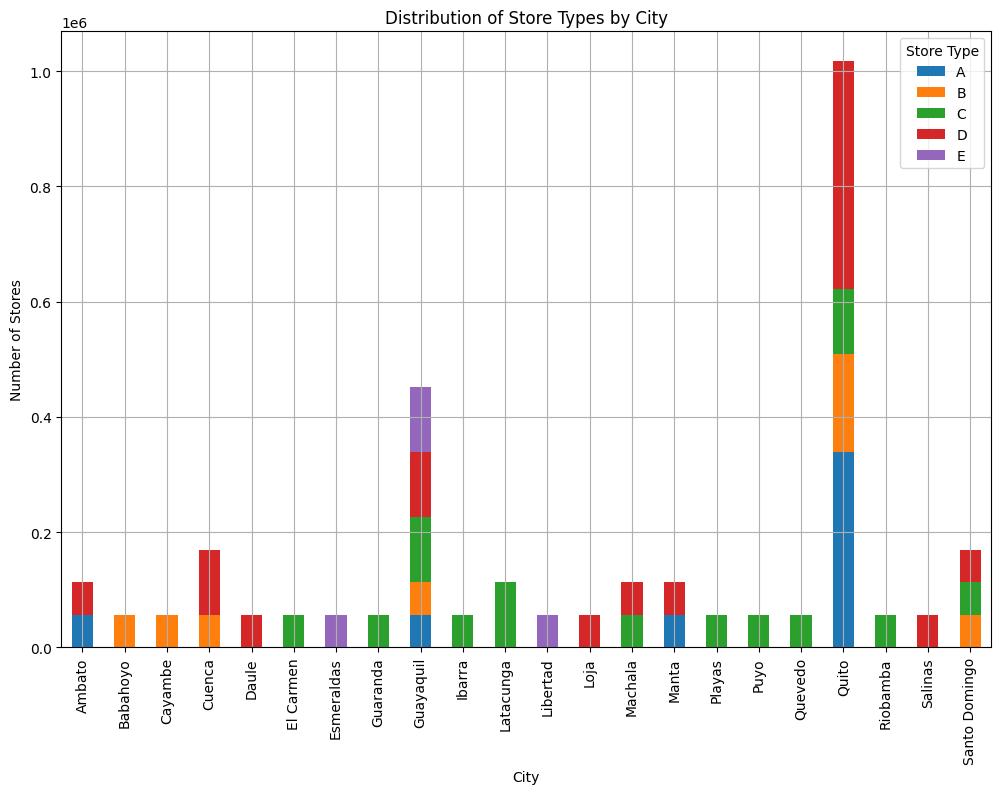

In [ ]:
# 도시(city)와 점포 유형(store_type) 별로 점포 수를 계산합니다.
store_type_by_city = train_df.groupby(['city', 'store_type']).size().unstack()

# 그래프를 그리기 위한 설정
plt.figure(figsize=(12, 8))

# 막대 그래프를 그립니다.
store_type_by_city.plot(kind='bar', stacked=True, ax=plt.gca())

# 그래프 타이틀과 축 레이블 설정
plt.title('Distribution of Store Types by City')
plt.xlabel('City')
plt.ylabel('Number of Stores')

# 범례 추가
plt.legend(title='Store Type')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

- Quito와 Guayaquil 도시는 다양한 매장 타입을 가지고있음
  
  - 에콰도르의 수도가 Quito

  - 그러나 인구수로는 최대 도시가 아님. 인구상 에콰도르의 최대 도시는 제 1의 항구도시인 Guayaquil이고 Quito는 그 다음으로 큰 도시

    (나무위키 참고)

  - 따라서 해당 두 도시에 매장 유형이 많은 것으로 유추할 수 있음

- 나머지 도시는 약 2개의 매장 타입을 가지고 있음

6) 도시 별 점포 수와 매출 분포 확인

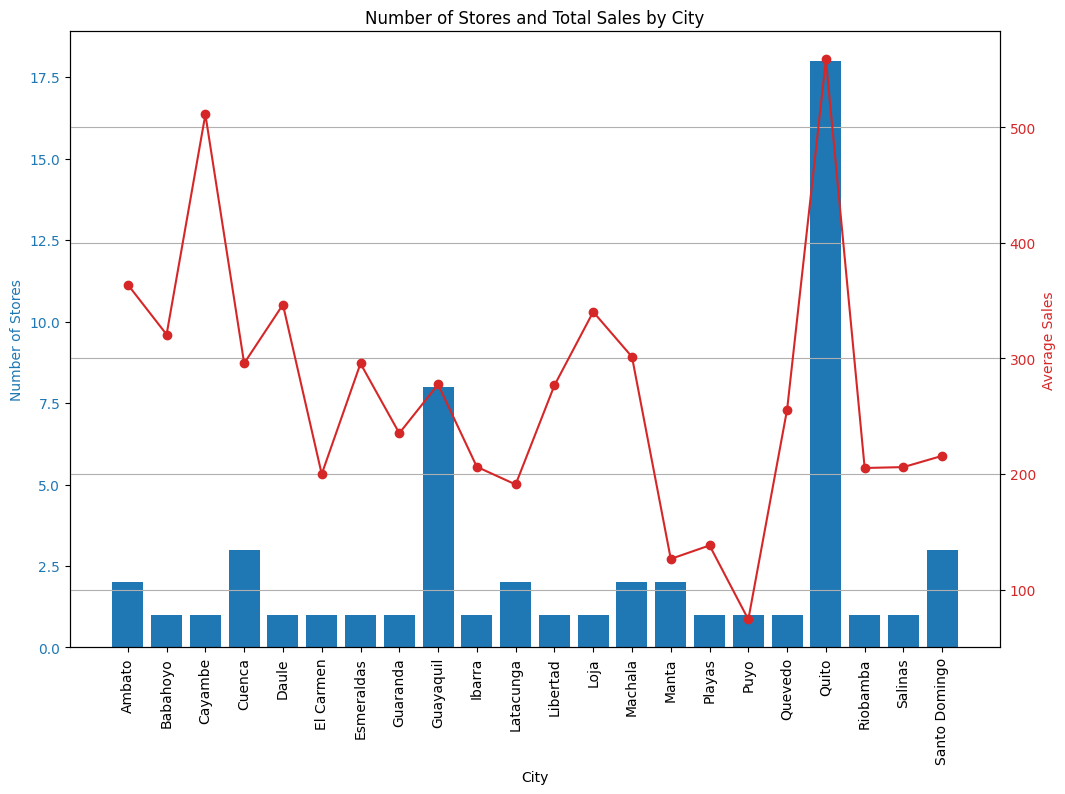

In [ ]:
# 도시(city) 별로 점포 수를 계산합니다.
stores_by_city = train_df.groupby('city')['store_nbr'].nunique()

# 도시(city) 별로 매출을 계산합니다.
sales_by_city = train_df.groupby('city')['sales'].mean()

# 그래프를 그리기 위한 설정
fig, ax1 = plt.subplots(figsize=(12, 8))

# 점포 수를 막대 그래프로 그립니다.
color = 'tab:blue'
ax1.bar(stores_by_city.index, stores_by_city, color=color)
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Stores', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 매출을 선 그래프로 그립니다.
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(sales_by_city.index, sales_by_city, color=color, marker='o')
ax2.set_ylabel('Average Sales', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# x 축의 눈금 레이블을 90도 회전시킵니다.
ax1.tick_params(axis='x', rotation=90)

# 그래프 타이틀 설정
plt.title('Number of Stores and Total Sales by City')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

- Quito가 가게 수가 가장 많고 평균 매출도 가장 높음

- Cayambe는 가게 수는 매우 낮지만 평균 매출이 2번째로 높다는게 주목할만한 점

   --> 프로모션 수 때문인가?

7) 도시 별 프로모션 수 분포

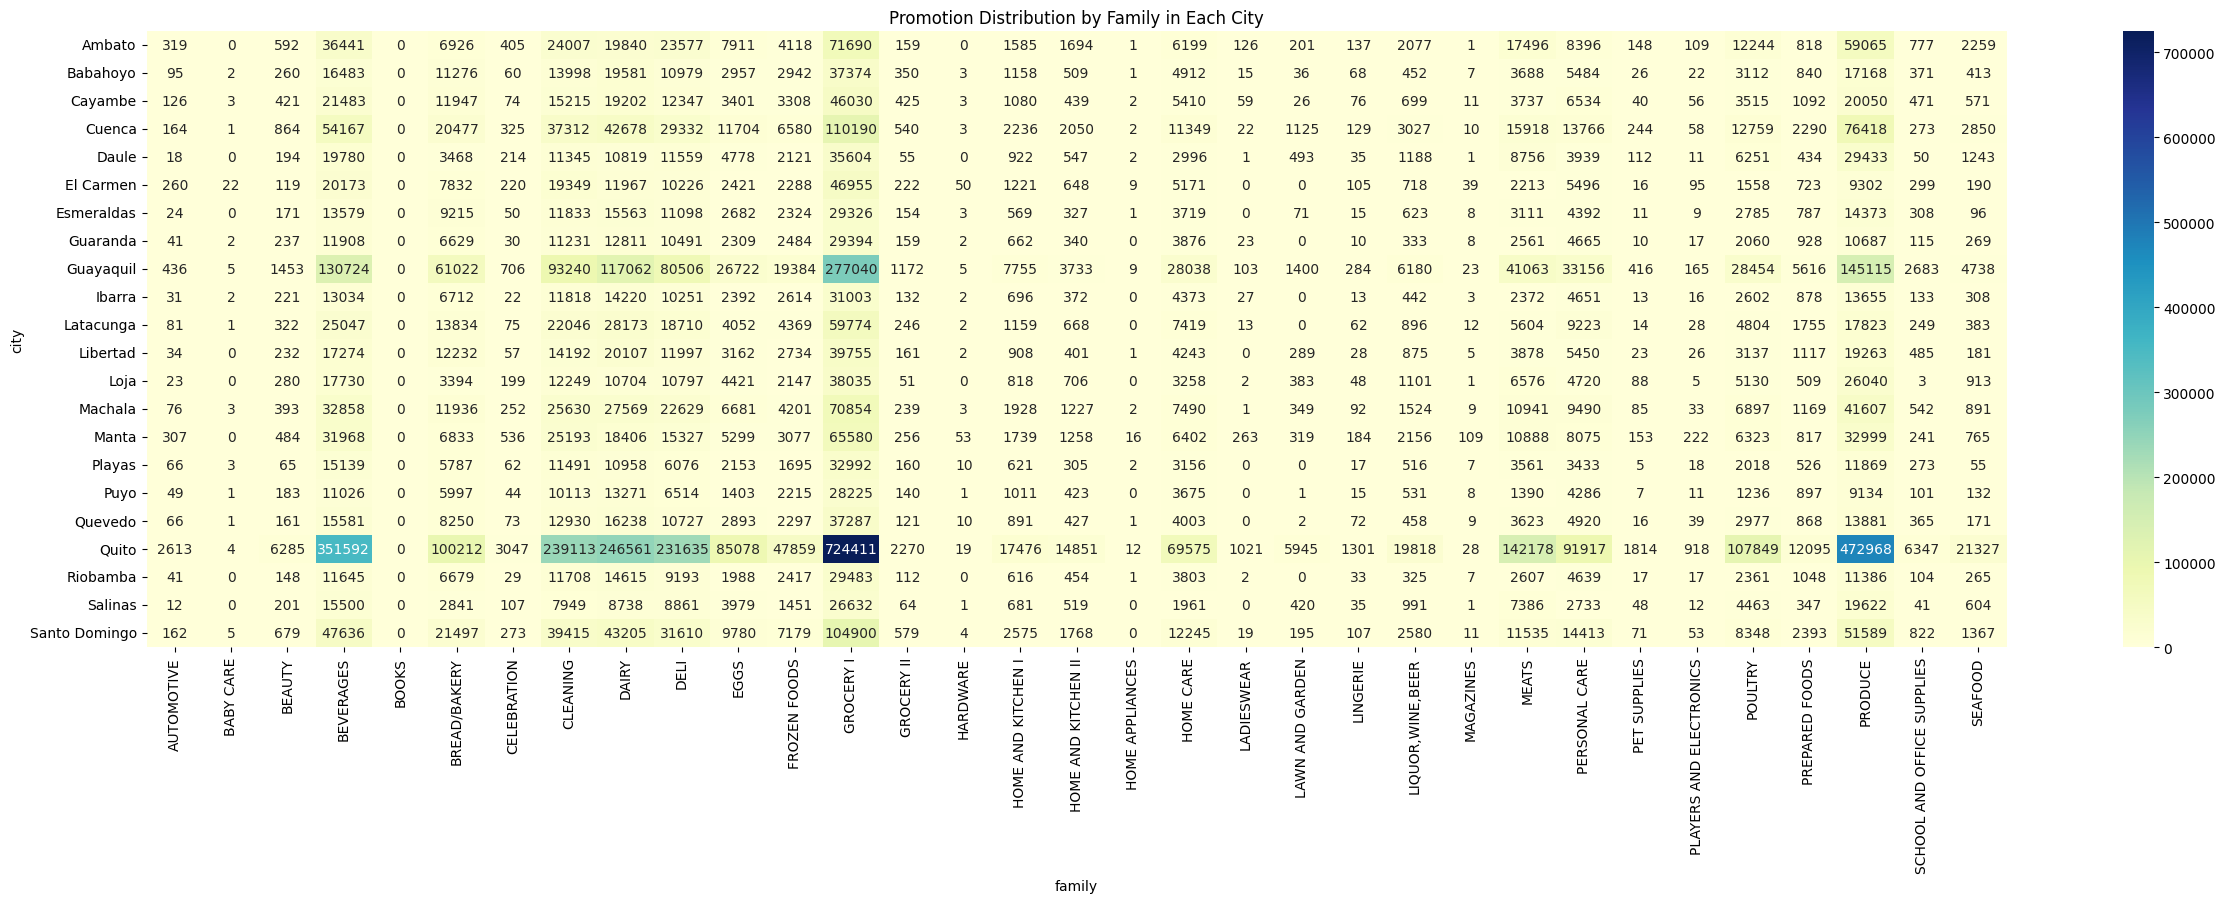

In [ ]:
import seaborn as sns

# 도시(city) 별로 상품(family)에 따른 프로모션 수를 계산합니다.
promotion_by_city_family = train_df.groupby(['city', 'family'])['onpromotion'].sum().unstack()

# 그래프를 그리기 위한 설정
plt.figure(figsize=(30, 8))

# 열 지도(Heatmap)를 그립니다.
sns.heatmap(promotion_by_city_family, cmap='YlGnBu', annot=True, fmt='g')

# 그래프 타이틀 설정
plt.title('Promotion Distribution by Family in Each City')

# 그래프 표시
plt.show()

- Cayambe가 매장 수는 적었지만 평균 매출이 높아서 프로모션 수가 많은가 했는데, 확인해보니 그건 아니었음

- 프로모션 수 말고 비율로 다시 한번 더 확인

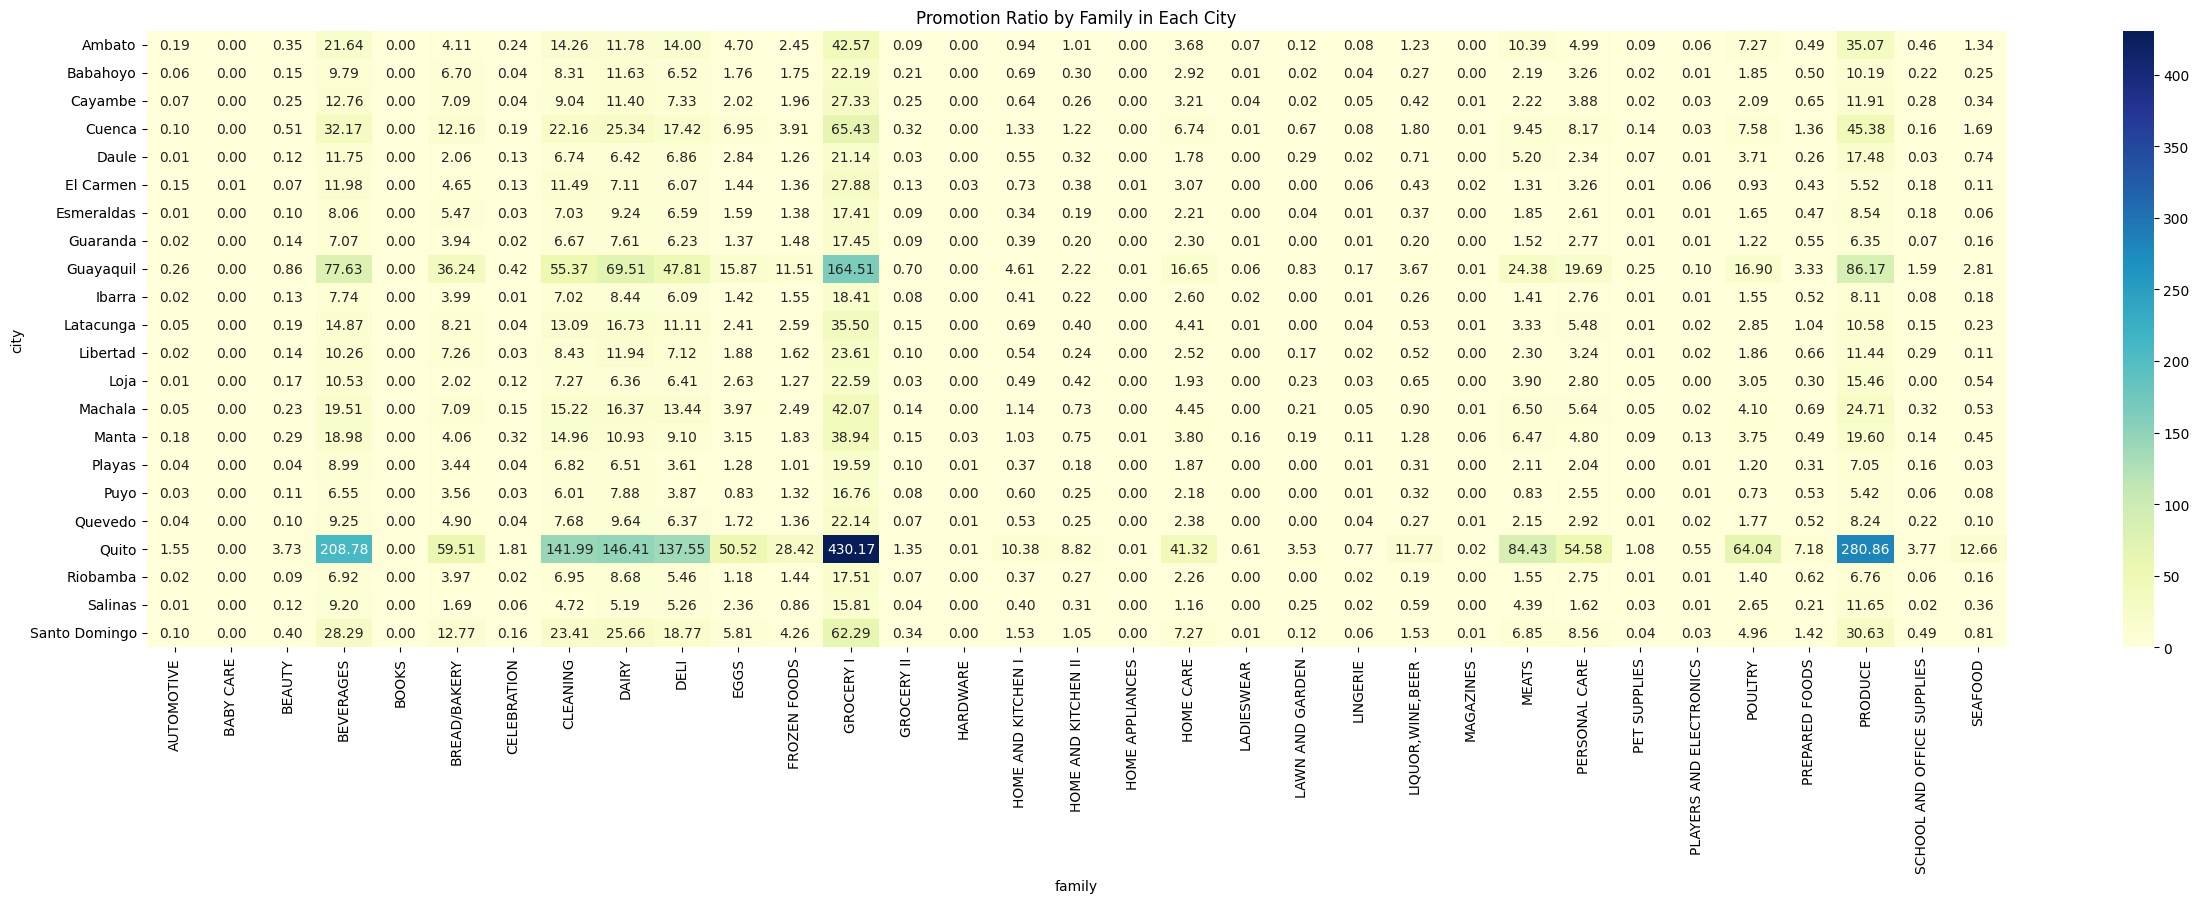

In [ ]:
# 도시(city) 별로 상품(family)에 따른 전체 프로모션 수를 계산합니다.
total_promotions_by_city = train_df.groupby('city')['onpromotion'].sum()

# 각 도시(city)에서 전체 기간 동안의 프로모션 일수를 계산합니다.
total_days_by_city = train_df['date'].nunique()

# 도시(city) 별로 상품(family)에 따른 프로모션 비율을 계산합니다.
promotion_ratio_by_city_family = train_df.groupby(['city', 'family'])['onpromotion'].sum().unstack() / total_days_by_city

# 그래프를 그리기 위한 설정
plt.figure(figsize=(30, 8))

# 열 지도(Heatmap)를 그립니다.
sns.heatmap(promotion_ratio_by_city_family, cmap='YlGnBu', annot=True, fmt='.2f')

# 그래프 타이틀 설정
plt.title('Promotion Ratio by Family in Each City')

# 그래프 표시
plt.show()

- Cayambe는 프로모션 비율로 봐도 높은 편은 아니었음